In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A1 - Eigenfunctions: [[2.56023908e-04 1.45261190e-03 5.65783874e-03 1.74247034e-02
  4.49716614e-02]
 [3.76704668e-04 2.08090003e-03 7.87406357e-03 2.34942195e-02
  5.85268103e-02]
 [5.51333049e-04 2.96477386e-03 1.08973737e-02 3.14957085e-02
  7.57119228e-02]
 [8.00736395e-04 4.19027275e-03 1.49549870e-02 4.18498820e-02
  9.70292964e-02]
 [1.15230933e-03 5.86545728e-03 2.03156030e-02 5.50069971e-02
  1.22892311e-01]
 [1.64247145e-03 8.12654770e-03 2.72920162e-02 7.14286436e-02
  1.53600267e-01]
 [2.31906176e-03 1.11444492e-02 3.62571650e-02 9.16072532e-02
  1.89280563e-01]
 [3.24162496e-03 1.51206884e-02 4.76086455e-02 1.15975906e-01
  2.29811559e-01]
 [4.48522818e-03 2.02874785e-02 6.17600353e-02 1.44840204e-01
  2.74657426e-01]
 [6.14601739e-03 2.69273187e-02 7.91314211e-02 1.78373546e-01
  3.22845903e-01]
 [8.33948492e-03 3.53568208e-02 1.00165628e-01 2.16551309e-01
  3.72969072e-01]
 [1.12001712e-02 4.59112671e-02 1.25213944e-01 2.59055528e-01
  4.23187934e-01]
 [1.48905387e-02 5.

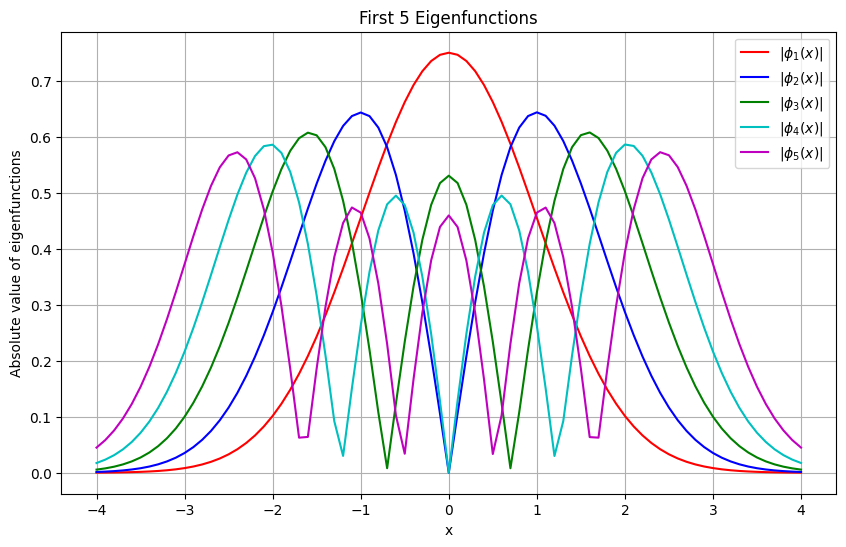

(81, 5)


In [ ]:
#Part A
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the BVP equation for the harmonic oscillator
def bvp_rhs(x, y, epsilon_n, K):
    return [y[1], (K * x**2 - epsilon_n) * y[0]]

# Normalize the eigenfunction using trapezoidal integration
def normalize_function(phi_n, xspan):
    norm_factor = np.trapz(np.abs(phi_n)**2, xspan)
    return phi_n / np.sqrt(norm_factor)

# Parameters
L = 4
K = 1
xspan = np.linspace(-L, L, 81)  # x values from -L to L with 81 points
eigenvalues = []  # Store the eigenvalues
eigenfunctions = np.zeros((len(xspan), 5))

col = ['r', 'b', 'g', 'c', 'm']

# Loop over the first 5 eigenvalues/modes
for n in range(5):
    epsilon_guess = (n + 1) * 2  # Starting guess for eigenvalue
    depsilon = 1.0  # Initial step size for eigenvalue adjustment

    # Shooting method with iterative eigenvalue adjustment
    for _ in range(1000):
        # Initial conditions
        y0 = [1, np.sqrt(L**2 - epsilon_guess)]
        sol = solve_ivp(bvp_rhs, [xspan[0], xspan[-1]], y0, args=(epsilon_guess, K), t_eval=xspan)

        # Check boundary condition to determine convergence
        if np.abs(sol.y[1, -1] + np.sqrt(L**2 - epsilon_guess) * sol.y[0, -1]) < 1e-4:
            eigenvalues.append(epsilon_guess)
            break

        # Adjust the guess for eigenvalue based on boundary behavior
        if (-1) ** (n + 1) * (sol.y[1, -1] + np.sqrt(L**2 - epsilon_guess) * sol.y[0, -1]) > 0:
            epsilon_guess -= depsilon
        else:
            epsilon_guess += depsilon / 2
            depsilon /= 2

    # Normalize the eigenfunction using trapezoidal integration
    phi_n_normalized = normalize_function(sol.y[0], xspan)

    # Store the absolute value of the normalized eigenfunction
    eigenfunctions[:, n] = np.abs(phi_n_normalized)

# Convert eigenvalues list to numpy array
eigenvalues = np.array(eigenvalues)

A1 = eigenfunctions
A2 = eigenvalues

# Display the results
print("A1 - Eigenfunctions:", A1)
print("A2 - Eigenvalues:", A2)

# Plot the eigenfunctions
plt.figure(figsize=(10, 6))
for n in range(5):
    plt.plot(xspan, eigenfunctions[:, n], col[n], label=f"$|\\phi_{{{n+1}}}(x)|$")
plt.xlabel("x")
plt.ylabel("Absolute value of eigenfunctions")
plt.title("First 5 Eigenfunctions")
plt.legend()
plt.grid(True)
plt.show()

print(np.shape(A1))

A3 - Normalized Eigenvectors: [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.490185

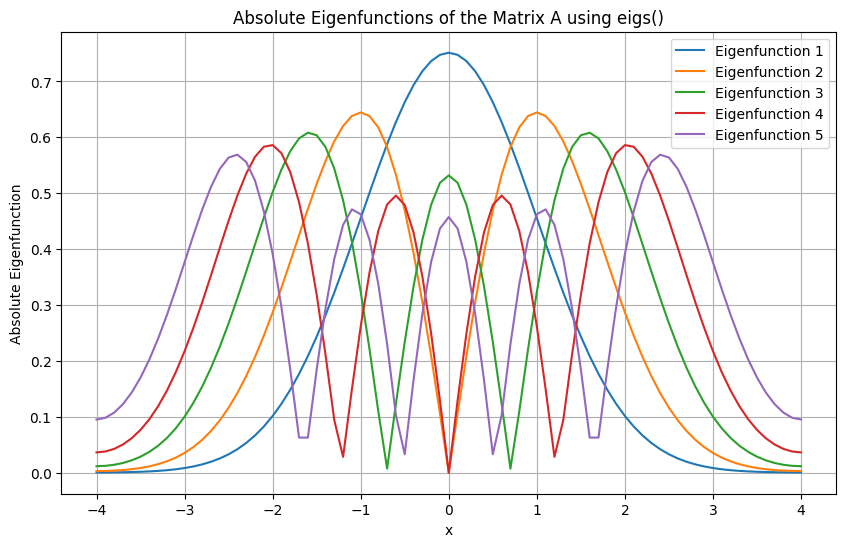

In [ ]:
#part B
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

# Parameters
L = 4
dx = 0.1
x = np.arange(-L, L + dx, dx)
N = len(x)

# Sparse matrix A
A = sp.lil_matrix((N-2, N-2))
A.setdiag(-2 - dx**2 * x[1:-1]**2)  # Main diagonal
A.setdiag(1, k=1)  # Upper diagonal
A.setdiag(1, k=-1)  # Lower diagonal

# Boundary conditions for sparse matrix
A[0, 0] += 4 / 3
A[0, 1] -= 1 / 3
A[-1, -2] -= 1 / 3
A[-1, -1] += 4 / 3
A = A.tocsr()

# Compute eigenvalues and eigenvectors using eigs
eigvals, eigvecs = sla.eigs(-A, k=5, which='SM')
eigvals = eigvals.real  # Take only real part

# C1 and C2 calculations
C1 = 4/3 * eigvecs[0, :] - 1/3 * eigvecs[1, :]
C2 = 4/3 * eigvecs[-1, :] - 1/3 * eigvecs[-2, :]

# Combine C1, eigvecs, and C2
B = np.vstack([C1, eigvecs.real, C2])

x_new = np.linspace(-L, L, B.shape[0])

# Normalize the eigenvectors in B
for i in range(B.shape[1]):
    norm = np.trapz(np.abs(B[:, i])**2, x_new)
    B[:, i] /= np.sqrt(norm)

# Sort and take the absolute values of the eigenvalues
eigval_final = np.sort(np.abs(eigvals / dx**2))
A4 = eigval_final
# Get normalized eigenvectors and take their absolute values
normalized_eigenvectors = np.abs(B[:, :5])
A3 = normalized_eigenvectors

# Display sorted eigenvalues
print("A3 - Normalized Eigenvectors:", normalized_eigenvectors)
print("A4 - Sorted Eigenvalues:", eigval_final)

# Plot the absolute values of the eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x_new, normalized_eigenvectors[:, i], label=f'Eigenfunction {i+1}')
plt.xlabel('x')
plt.ylabel('Absolute Eigenfunction')
plt.title('Absolute Eigenfunctions of the Matrix A using eigs()')
plt.legend()
plt.grid(True)
plt.show()


A5 - Eigenfunctions for gamma = 0.05:
 [[1.10633324e-01 3.43006371e-01]
 [1.31426570e-01 3.80319341e-01]
 [1.55622089e-01 4.20329274e-01]
 [1.83286860e-01 4.61700394e-01]
 [2.14396951e-01 5.02896670e-01]
 [2.48817687e-01 5.42274189e-01]
 [2.86303654e-01 5.78081156e-01]
 [3.26498694e-01 6.08457896e-01]
 [3.69028581e-01 6.31558987e-01]
 [4.13251351e-01 6.45565314e-01]
 [4.58253565e-01 6.48582850e-01]
 [5.03115993e-01 6.39171096e-01]
 [5.46914496e-01 6.16361222e-01]
 [5.88720028e-01 5.79656077e-01]
 [6.27598629e-01 5.29030182e-01]
 [6.62611435e-01 4.64982200e-01]
 [6.92814670e-01 3.88668048e-01]
 [7.17259649e-01 3.01706345e-01]
 [7.35095084e-01 2.06161776e-01]
 [7.45929678e-01 1.04546497e-01]
 [7.49533361e-01 1.79865272e-04]
 [7.45844041e-01 1.04734220e-01]
 [7.34973970e-01 2.06243403e-01]
 [7.17209749e-01 3.01792229e-01]
 [6.93012320e-01 3.88827425e-01]
 [6.63016972e-01 4.65236609e-01]
 [6.28033341e-01 5.29348286e-01]
 [5.89044299e-01 5.79955079e-01]
 [5.47112679e-01 6.16591231e-01]
 [5.

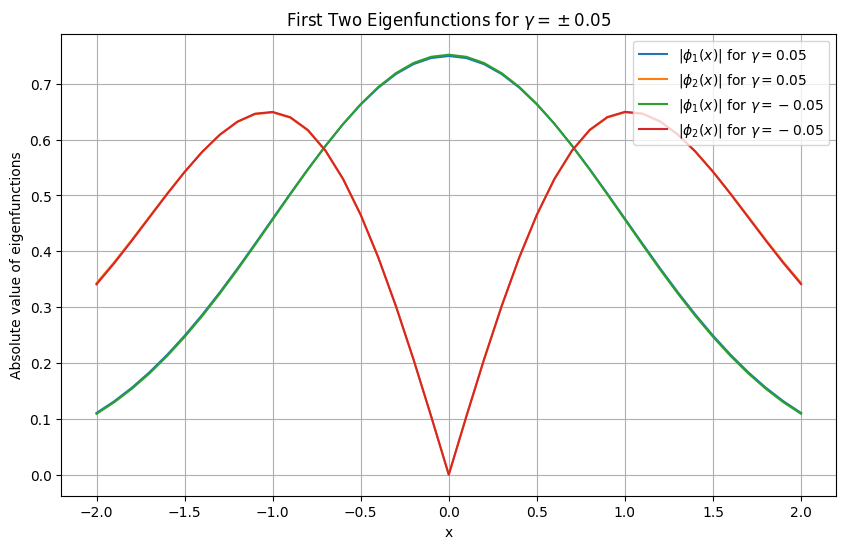

In [ ]:
#Part C
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
L = 2
dx = 0.1
xspan = np.arange(-L, L + dx, dx)
t_span = [xspan[0], xspan[-1]]
K = 1
tol = 1e-4

# Define the ODE system
def shoot(x, y, gamma, epsilon):
    y_n = y[1]
    yprime = (gamma * y[0] ** 2 + x ** 2 - epsilon) * y[0]
    return [y_n, yprime]

# Define arrays for gamma = 0.05 and gamma = -0.05
A5 = np.zeros((len(xspan), 2))  # Eigenfunctions for gamma = 0.05
A6 = np.zeros(2)                # Eigenvalues for gamma = 0.05
A7 = np.zeros((len(xspan), 2))  # Eigenfunctions for gamma = -0.05
A8 = np.zeros(2)                # Eigenvalues for gamma = -0.05

# Main loop for both values of gamma
for gamma in [0.05, -0.05]:
    e_start = 0.1
    A = 1e-6  # Initial amplitude

    for mode in range(2):  # Mode loop
        delta_A = 0.1

        for _ in range(1000):
            epsilon = e_start
            depsilon = 0.2  # Initial step size for eigenvalue adjustment

            for j in range(1000):  # Iteration limit
                initial = [A, A * np.sqrt(L**2 - epsilon)]
                sol = solve_ivp(lambda x, y: shoot(x, y, gamma, epsilon), t_span=t_span, y0=initial, t_eval=xspan)
                ys = sol.y.T
                x_out = sol.t

                # Check if boundary condition is satisfied
                boundary = ys[-1,1] + np.sqrt(L**2 - epsilon) * ys[-1,0]

                if np.abs(boundary) < tol:
                    break
                if (-1) ** mode * boundary > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2

            # Normalize eigenfunctions if the area condition is satisfied
            area = np.trapz(ys[:,0] ** 2, x=x_out)
            if np.abs(area - 1) < tol:
                break
            if area < 1:
                A += delta_A
            else:
                A -= delta_A / 2
                delta_A /= 2

        e_start = epsilon + 0.2
        if gamma == 0.05:
            A5[:, mode] = np.abs(ys[:,0])
            A6[mode] = epsilon
        else:
            A7[:, mode] = np.abs(ys[:,0])
            A8[mode] = epsilon

# Display the results
print("A5 - Eigenfunctions for gamma = 0.05:\n", A5)
print("A6 - Eigenvalues for gamma = 0.05:\n", A6)
print("A7 - Eigenfunctions for gamma = -0.05:\n", A7)
print("A8 - Eigenvalues for gamma = -0.05:\n", A8)

# Plot the eigenfunctions for gamma = ±0.05
plt.figure(figsize=(10, 6))
plt.plot(xspan, A5[:, 0], label=r"$|\phi_1(x)|$ for $\gamma = 0.05$")
plt.plot(xspan, A5[:, 1], label=r"$|\phi_2(x)|$ for $\gamma = 0.05$")
plt.plot(xspan, A7[:, 0], label=r"$|\phi_1(x)|$ for $\gamma = -0.05$")
plt.plot(xspan, A7[:, 1], label=r"$|\phi_2(x)|$ for $\gamma = -0.05$")
plt.xlabel("x")
plt.ylabel("Absolute value of eigenfunctions")
plt.title(r"First Two Eigenfunctions for $\gamma = \pm 0.05$")
plt.legend()
plt.grid(True)
plt.show()


RK45 slope: 5.24
RK23 slope: 3.02
Radau slope: 4.04
BDF slope: 6.46
A9 - Slopes vector [[5.24466756]
 [3.01909953]
 [4.03819927]
 [6.45751261]]


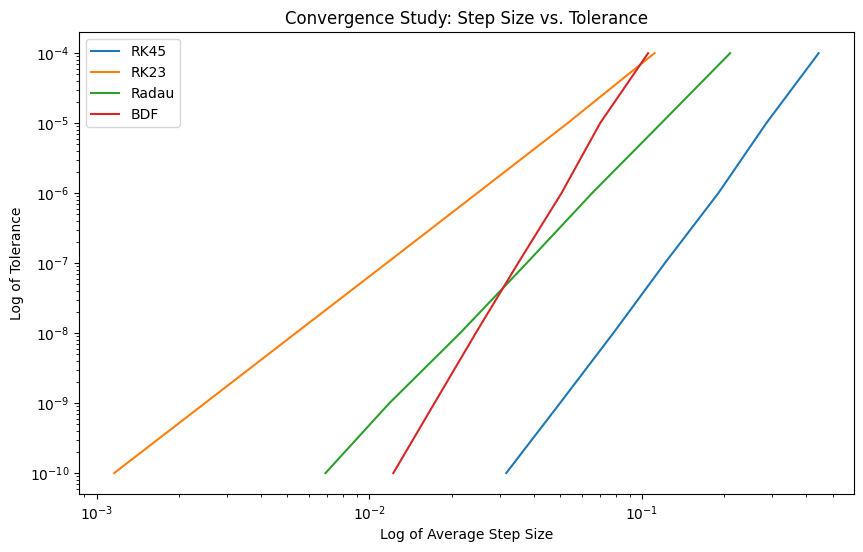

In [ ]:
#Part D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
L = 2
K = 1
epsilon_n = 1
phi = 1
phi_x = np.sqrt(K * L**2 - 1)
y0 = [phi, phi_x]
x_span = [-L, L]
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Differential equation for boundary value problem
def bvp_rhs(x, y, epsilon_n, K):
    return [y[1], (K * x**2 - epsilon_n) * y[0]]

# Function to perform  convergence study
def convergence_study(method, label):
    avg_step_sizes = []
    for tol in tolerances:
        options = {'rtol': tol, 'atol': tol}
        sol = solve_ivp(bvp_rhs, x_span, y0, method=method, args=(epsilon_n, K), **options)

        # Calculate average step size
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        avg_step_sizes.append(avg_step_size)

    plt.loglog(avg_step_sizes, tolerances, label=f'{method}')
    # Log-log plot
    log_tol = np.log10(tolerances)
    log_step_size = np.log10(avg_step_sizes)
    slope, _ = np.polyfit(log_step_size, log_tol, 1)

    #plt.plot(log_step_size, log_tol, label=f"{label} (slope: {slope:.2f})")
    return slope

# Plot settings
plt.figure(figsize=(10, 6))
plt.xlabel("Log of Average Step Size")
plt.ylabel("Log of Tolerance")
plt.title("Convergence Study: Step Size vs. Tolerance")

# Run convergence study for each method
slope_rk45 = convergence_study('RK45', 'RK45')
slope_rk23 = convergence_study('RK23', 'RK23')
slope_radau = convergence_study('Radau', 'Radau')
slope_bdf = convergence_study('BDF', 'BDF')

# Display slopes
print(f"RK45 slope: {slope_rk45:.2f}")
print(f"RK23 slope: {slope_rk23:.2f}")
print(f"Radau slope: {slope_radau:.2f}")
print(f"BDF slope: {slope_bdf:.2f}")

# Save slopes as a 4x1 vector
slopes_vector = np.array([slope_rk45, slope_rk23, slope_radau, slope_bdf]).reshape(4, 1)
A9 = slopes_vector
A9 = A9.flatten()
print("A9 - Slopes vector", A9)

# Show plot
plt.legend()
plt.show()

Compare your solutions in both (a) and (b) of homework 1 with the exact Gauss-Hermite polynomial
solutions for this problem (See wikipedia.com, for instance). Compute the error between your numerical solution and the exact solution for the values of the eigenfunctions and eigenvalues computed above. Specifically,
calculate the following quantity for each eigenfunction ∥ |φnumerical|−|φexact| ∥ where ∥f(x)∥ = RL f(x)2dx. n n −L
For the eigenvalues, simply calculate the relative percent error 100 × (|εnumerical − εexact|/εexact). The error nnn
vectors associated with the eigenfunctions and eigenvalues should be 5x1 vectors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L=4
x = np.arange(-L, L +0.1, 0.1)
n = len(x)

# Factorial function
def factorial(j):
    result = 1
    for i in range(1, j + 1):
        result *= i
    return result

# Define Hermite polynomials
h = np.array([np.ones_like(x),
              2 * x,
              4 * x**2 - 2,
              8 * x**3 - 12 * x,
              16 * x**4 - 48 * x**2 + 12])

# Phi function
phi_vals = np.zeros((len(x), 5))
for j in range(5):
        phi_vals[:, j] = (np.exp(-x**2 / 2) * h[j, :]) / np.sqrt(factorial(j) * 2**j * np.sqrt(np.pi)).T

# Error calculations
erpsi_a = np.zeros(5)
erpsi_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

phi_x = phi_vals

for j in range(5):
    # Error in eigenfunctions
    erpsi_a[j] = np.trapz((np.abs(A1[:, j]) - np.abs(phi_x[:, j]))**2, x)
    erpsi_b[j] = np.trapz((np.abs(A3[:, j]) - np.abs(phi_x[:, j]))**2, x)

    # Relative percent error in eigenvalues
    er_a[j] = 100 * np.abs((A2[j] - (2 * (j + 1) - 1)) / (2 * (j + 1) - 1))
    er_b[j] = 100 * np.abs((A4[j] - (2 * (j + 1) - 1)) / (2 * (j + 1) - 1))

# Results
A10 = erpsi_a
A12 = erpsi_b
A11 = er_a
A13 = er_b

print("A10 - Error in eigenfunctions for solution a:", A10)
print("A11 - Error in eigenfunctions for solution b:", A11)
print("A12 - Relative percent error in eigenvalues for solution a:", A12)
print("A13 - Relative percent error in eigenvalues for solution b:", A13)



A10 - Error in eigenfunctions for solution a: [4.57692712e-08 1.72430874e-07 2.47858896e-07 4.35413483e-07
 1.96415778e-06]
A11 - Error in eigenfunctions for solution b: [0.02642089 0.0332466  0.03073886 0.03455707 0.04161729]
A12 - Relative percent error in eigenvalues for solution a: [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A13 - Relative percent error in eigenvalues for solution b: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
